#Project 7 - Linear Regression and Machine Learning
##Levi Lowther
##02/26/23

##1 - 10.16  Import Necessary Libraries

In [158]:
import matplotlib.pyplot as plt

import pandas as pd

from scipy import stats

import seaborn as sns

import numpy as np

##2 - Celsius and Fahrenheit equivalents

In [159]:
#formula using lambda to calculate equivalents
c = lambda f: 5 / 9 * (f-32) 

In [160]:
#store each pair as a tulple in temps
temps = [(f, c(f)) for f in range(0, 101, 10)]

##3 - Use Plot Method to show linear relationship

In [161]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

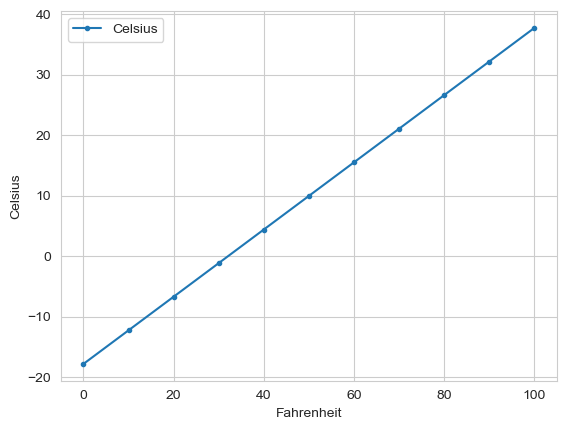

In [162]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

##4 - Load NCY Average high temps into Data Frame

In [163]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [164]:
#look at the first five rows
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [165]:
#look at the last five rows
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


##5 - Clean Data

In [166]:
#rename columns
nyc.columns = ['Date', 'Temperature', 'Anomaly']

#View first three rows
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [167]:
#check date column type
nyc.Date.dtype

dtype('int64')

In [168]:
#truncate values with floor division
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##6 - Calculate basic decriptive statistics

In [169]:
#set decimal places to 2
pd.set_option('display.precision', 2)

#call description
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

##7 - Forecasting Future Temps

In [170]:
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

In [171]:
#call slope
linear_regression.slope

0.014771361132966163

In [172]:
#call intercept
linear_regression.intercept

8.694993233674289

In [173]:
#calculate future temp
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [174]:
#calculate past temp
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

##8 - Use Seaborn to plot Temperatures

(10.0, 70.0)

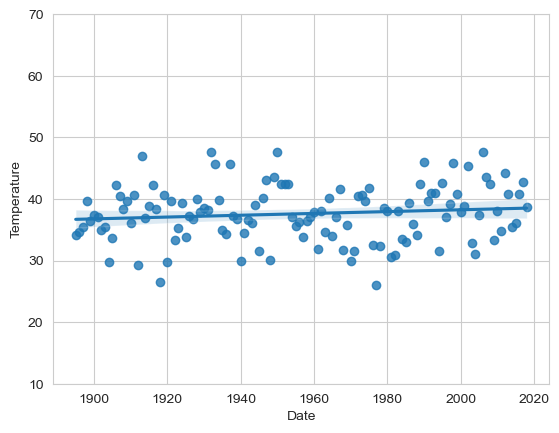

In [175]:
sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

##9 - 15.4 Time Series and Simple Linear Regression

In [176]:
#check first three entries to ensure changes are the same
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##10 - Splitting the Data

In [177]:
#transform from one dimension to two dimensions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
     random_state=11)

In [178]:
#check shape of X_train
X_train.shape

(93, 1)

In [179]:
#check shape of X_test
X_test.shape

(31, 1)

##11 - Train A Linear Regression Estimator

In [180]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [181]:
# get slope
linear_regression.coef_

array([0.01939167])

In [182]:
# get intercept
linear_regression.intercept_

-0.30779820252657686

##12 - Test the Newly Trained Model

In [183]:
predicted = linear_regression.predict(X_test)

expected =  y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


##13 - Predicting the Future and Estimating the Past

In [184]:
predict = (lambda x: linear_regression.coef_ * x +
                    linear_regression.intercept_)

In [185]:
#predict temps in 2019
predict(2019)

array([38.84399018])

In [186]:
#estimate temps in 1890
predict(1890)

array([36.34246432])

##14 - Visulizing the Data

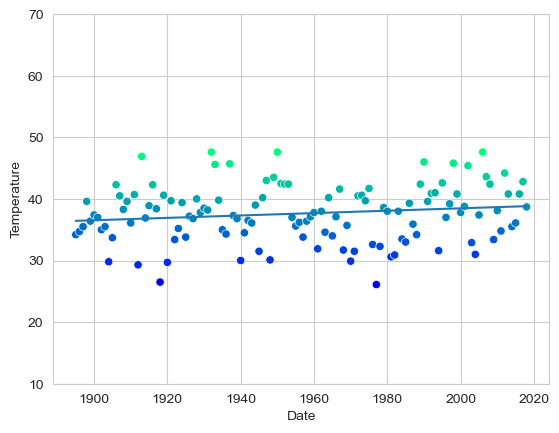

In [187]:
# create scatterplot
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)

#scale y axis to better see relationships
axes.set_ylim(10, 70)

#create array with min and max
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

#predict x
y = predict(x)

#plot regression line
line = plt.plot(x, y)


In [188]:
#seaborn alowed us to get to the scatter plot much more quickly with fewer lines of code. 
#using matplotlib did take a little longer, but I like the result more. 
#the color gradient is a nice touch for visulization. 